In [2]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# from solutions_biv import categorical_solution_1

We'll continue to make use of the fuel economy dataset in this workspace.

In [3]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


###  **TO DO**
Use a plot to explore whether or not there are differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) 


**Note**: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

In [16]:
# YOUR CODE HERE

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
fuel_econ = fuel_econ[fuel_econ['fuelType'].isin('Regular Gasoline')]

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [10]:
ct_counts = fuel_econ.groupby(['VClass', 'fuelType']).size()

KeyError: 'fuelType'

In [6]:
ct_counts = ct_counts.reset_index(name='count')

In [7]:
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'fuelType', values = 'count')

<AxesSubplot: xlabel='fuelType', ylabel='VClass'>

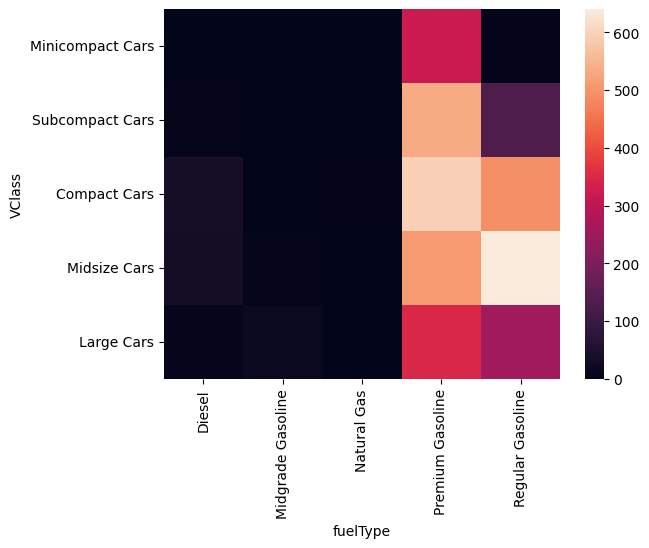

In [8]:
sb.heatmap(ct_counts)

### Expected Output